1. Exercício 1 do class

In [153]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df_avocado = pd.read_csv('C:\\Users\\Fabio\\Desktop\\Data Science\\banco_dados\\avocado.csv')
df_type = pd.read_csv('C:\\Users\\Fabio\\Desktop\\Data Science\\banco_dados\\avocado_type.csv')

new_df = pd.concat([df_avocado, df_type], axis=1)

new_df.to_csv('C:\\Users\\Fabio\\Desktop\\Data Science\\banco_dados\\avocado_type_modify.csv')

In [32]:
new_df

,Date,AveragePrice,Total Volume,year,region,type,type
0,2015-12-27,1.33,64236.62,2015,Albany,conventional,conventional
1,2015-12-20,1.35,54876.98,2015,Albany,conventional,conventional
2,2015-12-13,0.93,118220.22,2015,Albany,conventional,conventional
3,2015-12-06,1.08,78992.15,2015,Albany,conventional,conventional
4,2015-11-29,1.28,51039.60,2015,Albany,conventional,conventional
...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2018,WestTexNewMexico,organic,organic
18245,2018-01-28,1.71,13888.04,2018,WestTexNewMexico,organic,organic
18246,2018-01-21,1.87,13766.76,2018,WestTexNewMexico,organic,organic
18247,2018-01-14,1.93,16205.22,2018,WestTexNewMexico,organic,organic


---

2) É importante para o nosso cliente saber quando a média de preço (AveragePrice) foi maior que um. Use a função apply para criar uma coluna que nos traz essa informação e salve o arquivo em excel.

In [68]:
AveragePrice_more_one = new_df[new_df["AveragePrice"] > 1]

In [69]:
AveragePrice_more_one.head()

,Date,AveragePrice,Total Volume,year,region,type,type
0,2015-12-27,1.33,64236.62,2015,Albany,conventional,conventional
1,2015-12-20,1.35,54876.98,2015,Albany,conventional,conventional
3,2015-12-06,1.08,78992.15,2015,Albany,conventional,conventional
4,2015-11-29,1.28,51039.60,2015,Albany,conventional,conventional
5,2015-11-22,1.26,55979.78,2015,Albany,conventional,conventional


In [70]:
AveragePrice_more_one = AveragePrice_more_one.groupby(by=["Date"])["AveragePrice"].value_counts()

In [71]:
AveragePrice_more_one.head()

Date        AveragePrice
2015-01-04  1.01            4
            1.02            3
            1.05            3
            1.09            2
            1.10            2
Name: AveragePrice, dtype: int64

In [72]:
AveragePrice_more_one.to_excel("C:\\Users\\Fabio\\Desktop\\Data Science\\banco_dados\\avocado_type_modify.xlsx")

---
3) Dada a base feita do exercício anterior, precisamos agora responder o seguinte:  
  
    a) Qual é a média do preço médio (AveragePrice) por ano?  
    b) Qual é a média do preço médio (AveragePrice) por ano para cada região (region)?

a) Qual é a média do preço médio (AveragePrice) por ano?  

In [74]:
new_df.head()

,Date,AveragePrice,Total Volume,year,region,type,type
0,2015-12-27,1.33,64236.62,2015,Albany,conventional,conventional
1,2015-12-20,1.35,54876.98,2015,Albany,conventional,conventional
2,2015-12-13,0.93,118220.22,2015,Albany,conventional,conventional
3,2015-12-06,1.08,78992.15,2015,Albany,conventional,conventional
4,2015-11-29,1.28,51039.60,2015,Albany,conventional,conventional


In [92]:
average_mean_year = new_df.groupby(by=["year"])["AveragePrice"].mean()

In [94]:
pd.DataFrame(average_mean_year)

,AveragePrice
year,
2015,1.375590
2016,1.338640
2017,1.515128
2018,1.347531


b) Qual é a média do preço médio (AveragePrice) por ano para cada região (region)?

In [126]:
average_mean_year_region = new_df.groupby(by=["region", "year"])["AveragePrice"].mean()

In [128]:
average_mean_year_region = pd.DataFrame(average_mean_year_region)
average_mean_year_region

AveragePrice
region           year              
Albany           2015      1.538750
                 2016      1.533942
                 2017      1.637830
                 2018      1.435833
Atlanta          2015      1.380577
...                             ...
West             2018      1.297083
WestTexNewMexico 2015      1.259320
                 2016      1.246635
                 2017      1.281538
                 2018      1.251250

[216 rows x 1 columns]

<Figure size 1080x864 with 0 Axes>

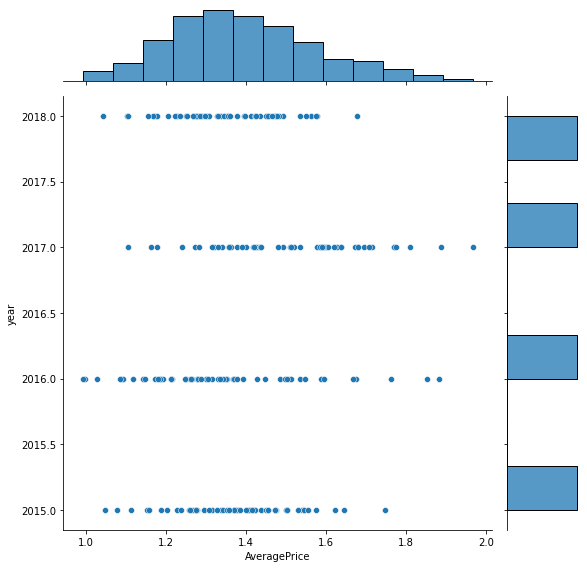

In [152]:
plt.figure(figsize=(15, 12))
sns.jointplot(data=average_mean_year_region, x="AveragePrice", y="year", height=8, ratio=5)

---

4) Você não tem processamento o suficiente para processar a base (base completa gerada no primeiro exercício) toda e precisa lê-la em chunks:   
  
    a) Leia a base por chunks (com chunksize=1000) e faça o processamento do exercício 3.  
    b) Guarde cada iteração dos chunks em um DataFrame e faça o processamento do exercício 3 de novo.

a) Leia a base por chunks (com chunksize=1000) e faça o processamento do exercício 3. 

In [202]:
df_new = pd.read_csv('C:\\Users\\Fabio\\Desktop\\Data Science\\banco_dados\\avocado_type_modify.csv', chunksize=1000)
c = 0
for avocado in df_new:
    average_mean_year = new_df.groupby(by=["year"])["AveragePrice"].mean()
    c = c + 1
    print(average_mean_year)
    print(c)

year
2015    1.375590
2016    1.338640
2017    1.515128
2018    1.347531
Name: AveragePrice, dtype: float64
1
year
2015    1.375590
2016    1.338640
2017    1.515128
2018    1.347531
Name: AveragePrice, dtype: float64
2
year
2015    1.375590
2016    1.338640
2017    1.515128
2018    1.347531
Name: AveragePrice, dtype: float64
3
year
2015    1.375590
2016    1.338640
2017    1.515128
2018    1.347531
Name: AveragePrice, dtype: float64
4
year
2015    1.375590
2016    1.338640
2017    1.515128
2018    1.347531
Name: AveragePrice, dtype: float64
5
year
2015    1.375590
2016    1.338640
2017    1.515128
2018    1.347531
Name: AveragePrice, dtype: float64
6
year
2015    1.375590
2016    1.338640
2017    1.515128
2018    1.347531
Name: AveragePrice, dtype: float64
7
year
2015    1.375590
2016    1.338640
2017    1.515128
2018    1.347531
Name: AveragePrice, dtype: float64
8
year
2015    1.375590
2016    1.338640
2017    1.515128
2018    1.347531
Name: AveragePrice, dtype: float64
9
year
2015 

b) Guarde cada iteração dos chunks em um DataFrame e faça o processamento do exercício 3 de novo.

In [215]:
df_new = pd.read_csv('C:\\Users\\Fabio\\Desktop\\Data Science\\banco_dados\\avocado_type_modify.csv', chunksize=1000)
c = 0
for avocado in range(19):
    average_mean_year[avocado] = pd.DataFrame(new_df.groupby(by=["year"])["AveragePrice"].mean())
    c = c + 1
    print(average_mean_year[avocado])
    print(c)

      AveragePrice
year              
2015      1.375590
2016      1.338640
2017      1.515128
2018      1.347531
1
      AveragePrice
year              
2015      1.375590
2016      1.338640
2017      1.515128
2018      1.347531
2
      AveragePrice
year              
2015      1.375590
2016      1.338640
2017      1.515128
2018      1.347531
3
      AveragePrice
year              
2015      1.375590
2016      1.338640
2017      1.515128
2018      1.347531
4
      AveragePrice
year              
2015      1.375590
2016      1.338640
2017      1.515128
2018      1.347531
5
      AveragePrice
year              
2015      1.375590
2016      1.338640
2017      1.515128
2018      1.347531
6
      AveragePrice
year              
2015      1.375590
2016      1.338640
2017      1.515128
2018      1.347531
7
      AveragePrice
year              
2015      1.375590
2016      1.338640
2017      1.515128
2018      1.347531
8
      AveragePrice
year              
2015      1.375590
2016      1.338

In [216]:
average_mean_year[18]

,AveragePrice
year,
2015,1.375590
2016,1.338640
2017,1.515128
2018,1.347531
